# Altair area chart examples

### By Ben Welsh

In [1]:
import altair as alt

In [ ]:
# Em seguida, trazemos nosso conjunto de dados de exemplo, que rastreia o mix de fontes de energia usadas para gerar eletricidade no estado de Iowa.

# É fornecido pela U.S. Energy Information Administration através da biblioteca de conjuntos de dados de exemplo do projeto Vega.

In [3]:
import vega_datasets

In [4]:
data = vega_datasets.data.iowa_electricity()

In [5]:
data.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
year              51 non-null datetime64[ns]
source            51 non-null object
net_generation    51 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


'''Isso mostra que a participação da eletricidade de Iowa gerada por fontes renováveis, como a energia eólica, disparou nos últimos anos.

Existem três fontes de eletricidade: combustíveis fósseis, energia nuclear e renováveis. Os números de geração líquida de cada fonte são reportados em milhares de megawatthours por ano. As datas estão codificadas no formato ISO.'''

'''Essa última parte é importante. O Altair geralmente espera que o eixo x dos gráficos de área seja baseado em datas que ele pode codificar como dados "temporais". Se os dados com os quais você está trabalhando forem inteiros ou algo além dos datastamps, você precisará encontrar uma solução alternativa. Nós vamos chegar a isso mais tarde.

Mas vamos fazer alguns gráficos, hein? Para começar, aqui está algo simples.'''

# Stacked area chart

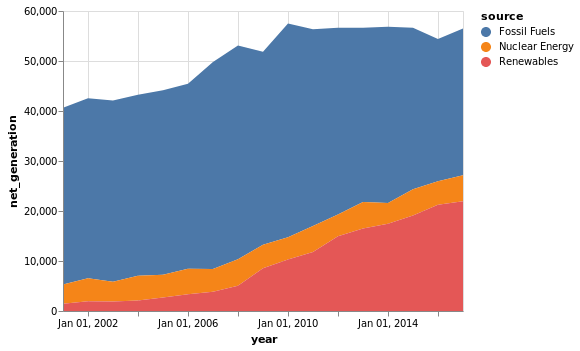

In [6]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N"
)

In [7]:
# Isso mostra o aumento absoluto das energias renováveis. Mas e quanto a uma parte? É aí que entra a opção "normalizar".

# Normalized stacked area chart

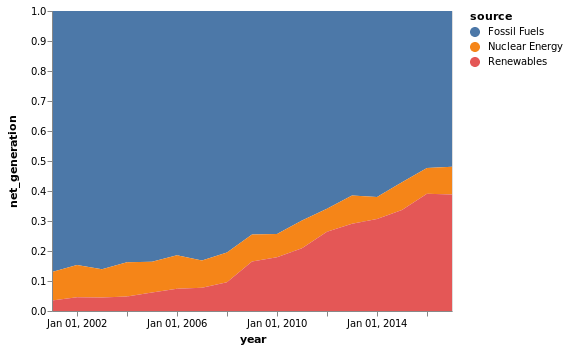

In [9]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y=alt.Y("net_generation:Q", stack="normalize"),
    color="source:N"
)

Acha um pouco difícil de ler? Você pode sobrepor as áreas umas sobre as outras removendo a pilha e diminuindo a opacidade.

# Layered area chart

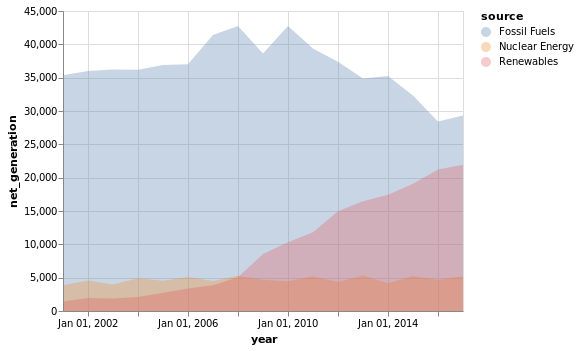

In [10]:
alt.Chart(data).mark_area(opacity=0.3).encode(
    x="year:T",
    y=alt.Y("net_generation:Q", stack=None),
    color="source:N"
)

Você preferiria ter pequenos muliples para comparar os gráficos lado a lado? Fácil. Use a opção de linha.

# Trellis area chart

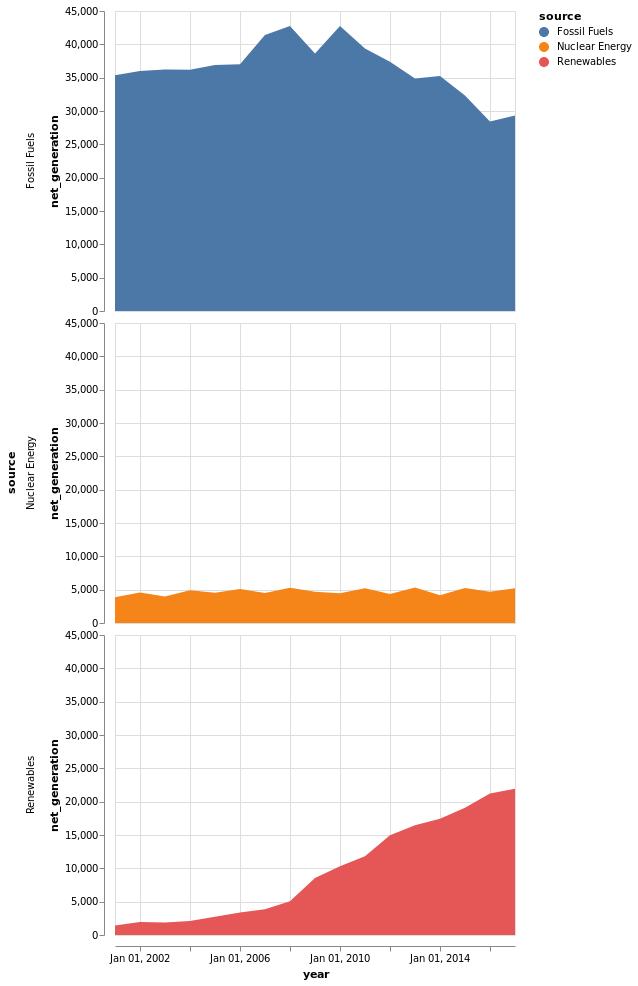

In [11]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N",
    row="source:N"
)

Depois de experimentar todos esses exemplos, acho que o normalizado conta nossa história da maneira mais clara e compacta. Veja como usar as outras opções do Altair para limpá-lo e prepará-lo para publicação.

# Normalized stacked area chart, manicured

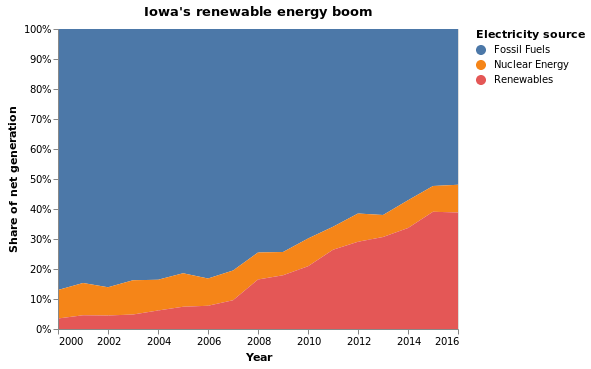

In [12]:
alt.Chart(
    data,
    title="Iowa's renewable energy boom"  # Name it
).mark_area().encode(
    x=alt.X(
        "year:T",
        timeUnit="year",  # Fix the X ticks by setting the time unit to display
        axis=alt.Axis(title="Year")  # Clean up the X label 
    ),
    y=alt.Y(
        "net_generation:Q",
        stack="normalize",
        axis=alt.Axis(title="Share of net generation", format=".0%"),  # Set the Y ticks to %
    ),
    color=alt.Color(
        "source:N",
        legend=alt.Legend(title="Electricity source"),  # Clean up the legend title
    )
)

# E aqueles outros formatos de data novamente?

Muitos conjuntos de dados anuais, especialmente os do governo dos EUA, tendem a liberar os dados como números inteiros, em vez de dados. O que você obtém normalmente parece um pouco mais com isso.

In [13]:
data.year = data.year.dt.year

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
year              51 non-null int64
source            51 non-null object
net_generation    51 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [15]:
data.head()

,year,source,net_generation
0,2001,Fossil Fuels,35361
1,2002,Fossil Fuels,35991
2,2003,Fossil Fuels,36234
3,2004,Fossil Fuels,36205
4,2005,Fossil Fuels,36883


Você ainda pode facilmente criar um gráfico de área Altair. Uma maneira rápida é codificar o eixo x como dados "ordinais".

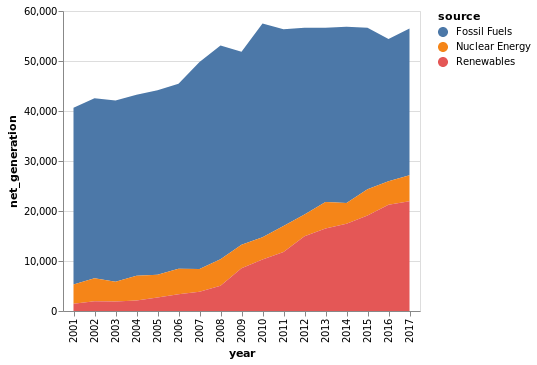

In [16]:
alt.Chart(data).mark_area().encode(
    x="year:O",  # <-- Right there
    y="net_generation:Q",
    color="source:N"
)

Você notará que o gráfico não sangra até a borda do quadro, mas se você estiver esboçando, talvez não se importe.

Se você quiser converter seus dados ordinais em datestamps para o gráfico, não é difícil. Pandas tem uma ferramenta construída em to_datetime.

In [17]:
import pandas as pd

In [18]:
data.year = pd.to_datetime(data.year, format="%Y")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
year              51 non-null datetime64[ns]
source            51 non-null object
net_generation    51 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


Agora você pode codificá-lo como dados temporais e obter os mesmos gráficos acima.

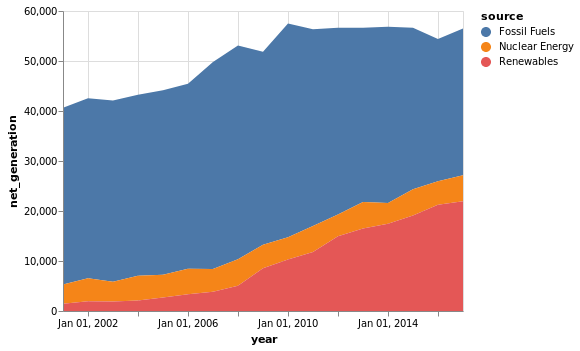

In [20]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N"
)